![image.png](https://i.imgur.com/a3uAqnb.png)

#**Lab: Pytorch Basics**


---



## **What is Pytorch?** <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/PyTorch_logo_icon.svg/500px-PyTorch_logo_icon.svg.png" width="4%">


**PyTorch** is an open-source deep learning framework that allows us to build and train neural networks using **tensors** and **automatic differentiation**.  
It provides simple, flexible tools to define models, compute gradients using backpropagation, and optimize parameters efficiently.

---


## 📦 **Tensors in PyTorch**

A **tensor** is the main data structure in PyTorch.  
It is similar to a NumPy array, but can run on both CPUs and GPUs.

Tensors are used to represent: input data, model parameters, and model outputs

### 🔹 Creating Tensors

In [ ]:
import torch

# Create tensors
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.randn(3)
print("x:", x)
print("y:", y)

x: tensor([1., 2., 3.])
y: tensor([0.3548, 0.3962, 0.4785])



**💡 Explanation:**

Imports PyTorch and creates your first tensor!

**What is a Tensor?**
- PyTorch's version of a NumPy array
- Can run on GPU for massive speedup
- Supports automatic differentiation (for deep learning)

**Creating tensors:**
```python
import torch

# From a Python list
x = torch.tensor([1, 2, 3])

# Create special tensors
zeros = torch.zeros(3, 3)    # 3x3 matrix of zeros
ones = torch.ones(2, 4)      # 2x4 matrix of ones
random = torch.randn(2, 3)   # Random numbers (normal distribution)
```

**Why Tensors vs NumPy Arrays?**

**NumPy:**
```python
import numpy as np
arr = np.array([1, 2, 3])
# ✗ Only runs on CPU
# ✗ No automatic differentiation
# ✓ Great for general computing
```

**PyTorch Tensors:**
```python
import torch
tensor = torch.tensor([1, 2, 3])
# ✓ Can run on GPU (100x faster!)
# ✓ Automatic gradients for deep learning
# ✓ Seamless deep learning integration
```

**Real-world analogy:**
- NumPy array = Calculator (CPU only, basic operations)
- PyTorch tensor = Supercomputer (CPU/GPU, advanced ML operations)

**Like:** Using Excel vs using a specialized data science platform!


### 🔹 Tensor Shapes



In [ ]:
print("Shape of x:", x.shape)

Shape of x: torch.Size([3])



**💡 Explanation:**

Understanding tensor shapes is crucial - they tell you the dimensions of your data!

**Tensor dimensions explained:**

**0D Tensor (Scalar):**
```python
x = torch.tensor(5)
print(x.shape)  # torch.Size([])
# Just a single number
```

**1D Tensor (Vector):**
```python
x = torch.tensor([1, 2, 3, 4])
print(x.shape)  # torch.Size([4])
# 4 elements in one dimension
# Like a list of numbers
```

**2D Tensor (Matrix):**
```python
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
print(x.shape)  # torch.Size([2, 3])
# 2 rows, 3 columns
# Like a spreadsheet
```

**3D Tensor:**
```python
x = torch.randn(2, 3, 4)
print(x.shape)  # torch.Size([2, 3, 4])
# 2 matrices, each 3x4
# Like multiple spreadsheets stacked
```

**4D Tensor (Common in images):**
```python
images = torch.randn(32, 3, 224, 224)
print(images.shape)  # torch.Size([32, 3, 224, 224])
# 32 images
# 3 color channels (RGB)
# 224x224 pixels each
```

**Reading shapes:**
```
torch.Size([32, 3, 224, 224])
             ↑   ↑   ↑    ↑
          batch  channels height width
```

**Real-world examples:**

**1D - Time series:**
```python
stock_prices = torch.tensor([100, 102, 98, 105, 103])
# Shape: [5]
# 5 days of prices
```

**2D - Tabular data:**
```python
students = torch.tensor([[85, 90, 78],  # Student 1: Math, Science, English
                         [92, 88, 95],  # Student 2
                         [78, 85, 82]]) # Student 3
# Shape: [3, 3]
# 3 students, 3 subjects
```

**3D - Video frames:**
```python
video = torch.randn(100, 720, 1280)
# Shape: [100, 720, 1280]
# 100 frames, each 720x1280 pixels
```

**4D - Batch of RGB images:**
```python
batch = torch.randn(16, 3, 256, 256)
# Shape: [16, 3, 256, 256]
# 16 images, RGB (3 channels), 256x256 each
```

**Why shapes matter:**

**Matrix multiplication requirements:**
```python
A = torch.randn(3, 4)  # [3, 4]
B = torch.randn(4, 5)  # [4, 5]
C = A @ B              # [3, 5] ✓ Works!

# But this fails:
D = torch.randn(3, 4)
E = torch.randn(3, 5)
F = D @ E  # ✗ Error! Shapes don't match
```

**Neural network layers:**
```python
# Input layer expects specific shape
input_tensor = torch.randn(32, 10)  # 32 samples, 10 features
layer = nn.Linear(10, 5)             # Expects input size 10
output = layer(input_tensor)         # Output: [32, 5] ✓

wrong_input = torch.randn(32, 8)     # Wrong feature count
output = layer(wrong_input)          # ✗ Error!
```

**Common shape operations:**
```python
x = torch.randn(2, 3, 4)

# Get number of dimensions
x.ndim  # 3

# Get size of specific dimension
x.size(0)  # 2
x.size(1)  # 3
x.size(2)  # 4

# Total number of elements
x.numel()  # 2 × 3 × 4 = 24
```

**Like:**
- 1D shape = Row in Excel
- 2D shape = Excel spreadsheet
- 3D shape = Multiple Excel sheets
- 4D shape = Multiple Excel workbooks


### 🔹 Tensor Operations

In [ ]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

# Element-wise operations
print("Addition:", a + b)
print("Multiplication:", a * b)

# Matrix multiplication
A = torch.randn(2, 3)
B = torch.randn(3, 2)
C = A @ B

print("Matrix multiplication result shape:", C.shape)

Addition: tensor([5., 7., 9.])
Multiplication: tensor([ 4., 10., 18.])
Matrix multiplication result shape: torch.Size([2, 2])



**💡 Explanation:**

PyTorch tensors support all standard mathematical operations!

**Basic arithmetic:**
```python
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

# Addition
c = a + b  # [5.0, 7.0, 9.0]

# Subtraction
d = b - a  # [3.0, 3.0, 3.0]

# Multiplication (element-wise)
e = a * b  # [4.0, 10.0, 18.0]

# Division
f = b / a  # [4.0, 2.5, 2.0]
```

**Matrix operations:**
```python
A = torch.randn(3, 4)
B = torch.randn(4, 5)

# Matrix multiplication
C = torch.matmul(A, B)  # [3, 5]
# Or using @ operator
C = A @ B  # Same as above
```

**Aggregation operations:**
```python
x = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])

x.sum()   # 15.0 (sum of all elements)
x.mean()  # 3.0 (average)
x.std()   # 1.58 (standard deviation)
x.max()   # 5.0 (maximum value)
x.min()   # 1.0 (minimum value)
```

**Operations along dimensions:**
```python
matrix = torch.tensor([[1, 2, 3],
                       [4, 5, 6]])

# Sum along rows (dim=0)
matrix.sum(dim=0)  # [5, 7, 9]
#                      ↑  ↑  ↑
#                    1+4 2+5 3+6

# Sum along columns (dim=1)
matrix.sum(dim=1)  # [6, 15]
#                     ↑   ↑
#                  1+2+3 4+5+6
```

**Broadcasting (automatic shape matching):**
```python
# Add scalar to tensor
x = torch.tensor([1, 2, 3])
y = x + 10  # [11, 12, 13]
# 10 is "broadcast" to [10, 10, 10]

# Add different shaped tensors
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])  # Shape: [2, 3]
b = torch.tensor([10, 20, 30])  # Shape: [3]

c = a + b  # Shape: [2, 3]
# Result: [[11, 22, 33],
#          [14, 25, 36]]
# b is broadcast to [[10, 20, 30],
#                    [10, 20, 30]]
```

**In-place operations (modifies original tensor):**
```python
x = torch.tensor([1.0, 2.0, 3.0])

# Regular operation (creates new tensor)
y = x + 5  # x is unchanged, y is new tensor

# In-place operation (modifies x)
x.add_(5)  # x is now [6.0, 7.0, 8.0]
# Note the underscore _ means "in-place"
```

**Useful tensor operations:**
```python
# Reshape
x = torch.randn(12)
y = x.view(3, 4)  # Reshape to [3, 4]

# Transpose
matrix = torch.randn(3, 4)
transposed = matrix.T  # Now [4, 3]

# Concatenate
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
c = torch.cat([a, b], dim=0)  # Stack vertically: [4, 2]
d = torch.cat([a, b], dim=1)  # Stack horizontally: [2, 4]

# Squeeze (remove dimensions of size 1)
x = torch.randn(1, 3, 1, 4)  # [1, 3, 1, 4]
y = x.squeeze()               # [3, 4]

# Unsqueeze (add dimension of size 1)
x = torch.randn(3, 4)     # [3, 4]
y = x.unsqueeze(0)        # [1, 3, 4]
z = x.unsqueeze(1)        # [3, 1, 4]
```

**Comparison operations:**
```python
a = torch.tensor([1, 2, 3, 4, 5])

# Element-wise comparison
a > 3   # [False, False, False, True, True]
a == 3  # [False, False, True, False, False]

# Filter elements
mask = a > 3
filtered = a[mask]  # [4, 5]
```

**Real-world examples:**

**Normalize data:**
```python
data = torch.tensor([100, 200, 150, 180, 120])
mean = data.mean()
std = data.std()
normalized = (data - mean) / std
# Standardized data with mean=0, std=1
```

**Compute accuracy:**
```python
predictions = torch.tensor([1, 0, 1, 1, 0])
targets = torch.tensor([1, 0, 0, 1, 0])

correct = (predictions == targets).sum().item()
accuracy = correct / len(targets)  # 0.8 (80%)
```

**Batch normalization:**
```python
batch = torch.randn(32, 10)  # 32 samples, 10 features

# Normalize each feature across batch
mean = batch.mean(dim=0)  # Mean per feature
std = batch.std(dim=0)    # Std per feature
normalized_batch = (batch - mean) / std
```

**Like:**
- Basic operations = Calculator functions
- Matrix multiplication = Spreadsheet formulas
- Broadcasting = Auto-fill in Excel
- Aggregations = SUM(), AVERAGE() in Excel




> See! just like Numpy Arrays, but more powerful!



---
## 📊 **Data Representation in Deep Learning**

The way data is represented depends on whether it is **structured (tabular)** or **unstructured (images)**.

### 🔹1️⃣ **Tabular Data (Structured Data)**
Tabular data consists of rows and columns.

Each row represents a sample and each column represents a feature.

- Represented as a **2D tensor**
- Shape: `(batch_size, number_of_features)`
- Commonly used for tasks like regression and classification

Example:
- Features: age, salary, debt  
- Tensor shape: `(N, 3)`

### 🔹2️⃣ **Image Data (Unstructured Data)**
Image data is unstructured and contains spatial information.

- Represented as a **4D tensor**
- Shape: `(batch_size, channels, height, width)`
- Channels represent color information:
  - Grayscale → 1 channel
  - RGB → 3 channels

Example:
- RGB image of size 224×224  
- Tensor shape: `(N, 3, 224, 224)`



---

## 📌 **How to Change Dimensions in PyTorch?**

Manipulating tensor shapes is essential in deep learning. PyTorch provides several functions to modify tensor dimensions.

### **🔹 1️⃣ Flatten**
- Converts **any shape** to `(batch_size, features)`.
- **Example:**  
  `(batch_size, channels, height, width) → (batch_size, features)`

### **🔹 2️⃣ Squeeze**
- **Removes dimensions** with size `1`.
- **Example:**  
  `(1, 32, 3, 28, 28) → (32, 3, 28, 28)`

### **🔹 3️⃣ Unsqueeze**
- **Adds a dimension** with size `1` at a specified position.
- **Example:**  
  `(3, 28, 28) → (1, 3, 28, 28)`

### **🔹 4️⃣ View (works similar to reshape)**
- **Reshapes a tensor freely** while maintaining the same number of elements.
- **Example:**  
  `(32, 3, 28, 28) → view(-1, 3*28*28) → (32, 3*28*28)`



In [ ]:
import torch

# 1️⃣ Flatten - Convert any shape to (batch_size, features)
x = torch.randn(32, 3, 28, 28)
x_flat = x.flatten(start_dim=1)
print("Flatten:", x_flat.shape)  # (32, 2352)

# 2️⃣ Squeeze - Remove dimensions with size 1
x = torch.randn(1, 3, 28, 28)
x_sq = x.squeeze()
print("Squeeze:", x_sq.shape)  # (3, 28, 28)

# 3️⃣ Unsqueeze - Add a new dimension of size 1
x = torch.randn(3, 28, 28)
x_unsq = x.unsqueeze(0)
print("Unsqueeze:", x_unsq.shape)  # (1, 3, 28, 28)

# 4️⃣ View - Reshape freely while keeping same number of elements
x = torch.randn(32, 28, 28, 3)
x_view = x.view(32, -1)  # Flatten all except batch
print("View:", x_view.shape)  # (32, 28*28*3)

Flatten: torch.Size([32, 2352])
Squeeze: torch.Size([3, 28, 28])
Unsqueeze: torch.Size([1, 3, 28, 28])
View: torch.Size([32, 2352])



**💡 Explanation:**

Reshaping tensors is essential for preparing data for neural networks!

**Common reshaping operations:**

**1. view() - Reshape tensor**
```python
x = torch.tensor([1, 2, 3, 4, 5, 6])  # Shape: [6]

# Reshape to 2D
y = x.view(2, 3)  # Shape: [2, 3]
# [[1, 2, 3],
#  [4, 5, 6]]

# Reshape to 3D
z = x.view(2, 1, 3)  # Shape: [2, 1, 3]
```

**Important:** Total elements must match!
```python
x = torch.randn(12)
y = x.view(3, 4)   # ✓ Works! 12 = 3 × 4
z = x.view(2, 5)   # ✗ Error! 12 ≠ 2 × 5
```

**Use -1 for automatic dimension:**
```python
x = torch.randn(24)
y = x.view(4, -1)   # [4, 6] - automatically calculates 6
z = x.view(-1, 8)   # [3, 8] - automatically calculates 3
w = x.view(2, 3, -1) # [2, 3, 4] - automatically calculates 4
```

**2. reshape() - More flexible alternative**
```python
x = torch.randn(12)
y = x.reshape(3, 4)  # Same as view() but handles edge cases better
```

**Difference between view() and reshape():**
```python
# view() requires contiguous memory
# reshape() works even if memory is not contiguous

x = torch.randn(3, 4)
y = x.T  # Transposed - not contiguous

z = y.view(3, 4)     # ✗ May fail
w = y.reshape(3, 4)  # ✓ Always works
```

**3. squeeze() - Remove dimensions of size 1**
```python
x = torch.randn(1, 3, 1, 4)  # [1, 3, 1, 4]

y = x.squeeze()      # [3, 4] - removes all 1s
z = x.squeeze(0)     # [3, 1, 4] - removes dim 0 only
w = x.squeeze(2)     # [1, 3, 4] - removes dim 2 only
```

**4. unsqueeze() - Add dimension of size 1**
```python
x = torch.randn(3, 4)  # [3, 4]

y = x.unsqueeze(0)   # [1, 3, 4] - add at beginning
z = x.unsqueeze(1)   # [3, 1, 4] - add in middle
w = x.unsqueeze(2)   # [3, 4, 1] - add at end
```

**5. flatten() - Convert to 1D**
```python
x = torch.randn(2, 3, 4)  # [2, 3, 4]
y = x.flatten()            # [24] - all elements in 1D

# Flatten from specific dimension
z = x.flatten(start_dim=1)  # [2, 12] - flatten dims 1 and 2
```

**6. permute() - Rearrange dimensions**
```python
x = torch.randn(2, 3, 4)  # [2, 3, 4]

# Swap dimensions
y = x.permute(2, 0, 1)  # [4, 2, 3]
# What was dim 2 is now dim 0
# What was dim 0 is now dim 1
# What was dim 1 is now dim 2
```

**7. transpose() - Swap two dimensions**
```python
x = torch.randn(2, 3, 4)  # [2, 3, 4]

y = x.transpose(0, 2)     # [4, 3, 2] - swap dims 0 and 2
z = x.transpose(1, 2)     # [2, 4, 3] - swap dims 1 and 2

# For 2D, can use .T
matrix = torch.randn(3, 4)  # [3, 4]
transposed = matrix.T        # [4, 3]
```

**Real-world reshaping scenarios:**

**Scenario 1: Prepare data for linear layer**
```python
# Have: Batch of images [32, 3, 28, 28]
# Need: Flat features [32, 2352]

images = torch.randn(32, 3, 28, 28)
flat = images.flatten(start_dim=1)  # [32, 2352]
# Now can pass to linear layer
```

**Scenario 2: Add batch dimension**
```python
# Have: Single image [3, 224, 224]
# Need: Batch format [1, 3, 224, 224]

image = torch.randn(3, 224, 224)
batched = image.unsqueeze(0)  # [1, 3, 224, 224]
# Now compatible with batch processing
```

**Scenario 3: Channels first to channels last**
```python
# PyTorch: [batch, channels, height, width]
# Some libraries need: [batch, height, width, channels]

x = torch.randn(32, 3, 224, 224)  # PyTorch format
y = x.permute(0, 2, 3, 1)         # [32, 224, 224, 3]
```

**Scenario 4: Reshape for RNN**
```python
# Have: [batch, features]
# Need: [sequence_length, batch, features]

x = torch.randn(32, 10)           # [batch=32, features=10]
x = x.unsqueeze(0)                # [1, 32, 10]
# Now: [seq_len=1, batch=32, features=10]
```

**Common pitfalls:**

**Pitfall 1: Element count mismatch**
```python
x = torch.randn(12)
y = x.view(3, 5)  # ✗ Error! 12 ≠ 15
```

**Pitfall 2: Using wrong dimension for operations**
```python
batch = torch.randn(32, 10)

# Wrong: Mean across all elements
mean_wrong = batch.mean()  # Single value

# Correct: Mean per feature
mean_correct = batch.mean(dim=0)  # [10] values
```

**Visual examples:**

**Reshaping [6] → [2, 3]:**
```
Original: [1, 2, 3, 4, 5, 6]

After view(2, 3):
[[1, 2, 3],
 [4, 5, 6]]
```

**Permute [2, 3, 4] → [4, 2, 3]:**
```
Original shape: [2, 3, 4]
After permute(2, 0, 1): [4, 2, 3]

What was depth (4) is now rows
What was rows (2) is now columns  
What was columns (3) is now depth
```

**Like:**
- view() = Reorganizing bookshelf (same books, different arrangement)
- squeeze() = Removing empty shelves
- unsqueeze() = Adding empty shelves
- flatten() = Putting all books in a single line
- permute() = Rotating a 3D object


---

## 📌 **Changing Data Type or Moving Data/Model to CPU/GPU**  

PyTorch allows you to **change the datatype** of a tensor and **move it between CPU and GPU** using `.to()`.  


### 🔹 **Change Datatype**
Use `.to(dtype)` to convert a tensor's data type.

In [ ]:
import torch

# Create a float32 tensor
x = torch.tensor([1.2, 2.3, 3.4], dtype=torch.float32)
print(x.dtype)  # Output: torch.float32

# Convert to float16
x_half = x.to(torch.float16)
print(x_half.dtype)  # Output: torch.float16

torch.float32
torch.float16



**💡 Explanation:**

Managing data types and devices (CPU/GPU) is crucial for performance and memory!

**Common PyTorch data types:**

**Integer types:**
```python
# 8-bit integer
x = torch.tensor([1, 2, 3], dtype=torch.int8)

# 16-bit integer
x = torch.tensor([1, 2, 3], dtype=torch.int16)

# 32-bit integer (default for integers)
x = torch.tensor([1, 2, 3], dtype=torch.int32)  
# Also: torch.int

# 64-bit integer
x = torch.tensor([1, 2, 3], dtype=torch.int64)
# Also: torch.long
```

**Float types:**
```python
# 16-bit float (half precision)
x = torch.tensor([1.0, 2.0], dtype=torch.float16)
# Also: torch.half

# 32-bit float (default for floats)
x = torch.tensor([1.0, 2.0], dtype=torch.float32)
# Also: torch.float

# 64-bit float (double precision)
x = torch.tensor([1.0, 2.0], dtype=torch.float64)
# Also: torch.double
```

**Boolean:**
```python
x = torch.tensor([True, False, True], dtype=torch.bool)
```

**Why data types matter:**

**Memory usage:**
```python
x_float64 = torch.randn(1000, dtype=torch.float64)  # 8 bytes per element
x_float32 = torch.randn(1000, dtype=torch.float32)  # 4 bytes per element
x_float16 = torch.randn(1000, dtype=torch.float16)  # 2 bytes per element

# float64: 8000 bytes
# float32: 4000 bytes (50% savings!)
# float16: 2000 bytes (75% savings!)
```

**Precision trade-off:**
```python
# float64 (double): High precision, more memory
# ✓ Scientific computing
# ✓ When accuracy is critical

# float32 (single): Good precision, standard
# ✓ Default for deep learning
# ✓ Good balance

# float16 (half): Lower precision, less memory
# ✓ Faster training on modern GPUs
# ✓ Mixed precision training
```

**Converting data types:**
```python
x = torch.tensor([1.5, 2.7, 3.9])  # float32 by default

# Convert to different types
x_int = x.int()       # [1, 2, 3] - truncates decimals
x_long = x.long()     # [1, 2, 3] - 64-bit integer
x_double = x.double() # [1.5, 2.7, 3.9] - 64-bit float
x_half = x.half()     # [1.5, 2.7, 3.9] - 16-bit float

# Using .to()
x_int = x.to(torch.int32)
x_long = x.to(torch.int64)
```

**CPU vs GPU (Device management):**

**Check GPU availability:**
```python
import torch

if torch.cuda.is_available():
    print("GPU is available!")
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("GPU not available, using CPU")
```

**Move tensors to GPU:**
```python
# Create tensor on CPU (default)
x = torch.randn(3, 4)
print(x.device)  # cpu

# Move to GPU
if torch.cuda.is_available():
    x_gpu = x.cuda()  # Move to GPU
    # Or:
    x_gpu = x.to('cuda')
    print(x_gpu.device)  # cuda:0
```

**Move back to CPU:**
```python
x_gpu = torch.randn(3, 4).cuda()
x_cpu = x_gpu.cpu()  # Move back to CPU
# Or:
x_cpu = x_gpu.to('cpu')
```

**Automatic device selection:**
```python
# Best practice: Automatically choose GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create tensor on chosen device
x = torch.randn(3, 4, device=device)

# Or move existing tensor
y = torch.randn(3, 4)
y = y.to(device)
```

**Performance comparison:**

**CPU:**
```python
x_cpu = torch.randn(1000, 1000)
y_cpu = torch.randn(1000, 1000)

# Matrix multiplication on CPU
result = x_cpu @ y_cpu  # ~10ms
```

**GPU:**
```python
x_gpu = torch.randn(1000, 1000, device='cuda')
y_gpu = torch.randn(1000, 1000, device='cuda')

# Matrix multiplication on GPU
result = x_gpu @ y_gpu  # ~0.1ms (100x faster!)
```

**Important rules:**

**Rule 1: Operations require same device**
```python
x_cpu = torch.randn(3, 4)
y_gpu = torch.randn(3, 4).cuda()

z = x_cpu + y_gpu  # ✗ Error! Different devices
```

**Solution:**
```python
# Move both to same device
x_gpu = x_cpu.cuda()
z = x_gpu + y_gpu  # ✓ Works!
```

**Rule 2: Model and data must be on same device**
```python
model = MyModel().cuda()  # Model on GPU
data = torch.randn(32, 10)  # Data on CPU

output = model(data)  # ✗ Error!

# Correct:
data = data.cuda()
output = model(data)  # ✓ Works!
```

**Real-world workflow:**

**Training setup:**
```python
# 1. Choose device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 2. Move model to device
model = MyModel().to(device)

# 3. Training loop
for batch_data, batch_labels in dataloader:
    # Move data to device
    batch_data = batch_data.to(device)
    batch_labels = batch_labels.to(device)
    
    # Forward pass
    outputs = model(batch_data)
    loss = criterion(outputs, batch_labels)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

**Memory considerations:**

**GPU memory is limited!**
```python
# Check GPU memory
if torch.cuda.is_available():
    print(f"Total memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    print(f"Allocated: {torch.cuda.memory_allocated() / 1e9:.2f} GB")
    print(f"Cached: {torch.cuda.memory_reserved() / 1e9:.2f} GB")
```

**Clear GPU memory:**
```python
# Delete tensors
del x_gpu, y_gpu

# Clear cache
torch.cuda.empty_cache()
```

**Mixed precision training (advanced):**
```python
from torch.cuda.amp import autocast, GradScaler

scaler = GradScaler()

for data, target in dataloader:
    optimizer.zero_grad()
    
    # Use automatic mixed precision
    with autocast():
        output = model(data)
        loss = criterion(output, target)
    
    # Scale loss and backprop
    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()
```

**Benefits of mixed precision:**
- 50% less memory usage
- 2-3x faster training
- Minimal accuracy loss

**Common data type conversions:**

**For labels (classification):**
```python
labels = torch.tensor([0, 1, 2, 1, 0])  # int64 by default
# Usually fine for CrossEntropyLoss
```

**For features:**
```python
features = torch.randn(100, 10)  # float32 by default
# Standard for neural networks
```

**Converting NumPy to PyTorch:**
```python
import numpy as np

# NumPy array
np_array = np.array([1.0, 2.0, 3.0])

# Convert to PyTorch
tensor = torch.from_numpy(np_array)

# Convert back to NumPy
np_array_back = tensor.numpy()
```

**Like:**
- Data types = Choosing precision in measurements (mm vs cm vs m)
- CPU/GPU = Using calculator vs supercomputer
- Same device requirement = All workers must be in same office
- Mixed precision = Using different decimal precision where needed


### 🔹 **Move Tensors to GPU (if available)**
**GPUs are faster and more efficient** in most cases when training or inferencing deep learning models.

Use `.to(device)` to move a tensor to GPU for faster computation.




In [ ]:
# Automatically select CPU or GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create a tensor and move it to GPU
x_gpu = x.to(device)
print(x_gpu.device)  # Output: cuda:0 (if GPU is available) or cpu

cpu



**💡 Explanation:**

Automatically selects the best available device (GPU if available, otherwise CPU)!

**The device selection pattern:**
```python
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
```

**What this does:**

**If GPU available:**
```python
torch.cuda.is_available()  # True
device = torch.device('cuda')
print(device)  # cuda
```

**If GPU not available:**
```python
torch.cuda.is_available()  # False
device = torch.device('cpu')
print(device)  # cpu
```

**Why this pattern is best practice:**

**❌ Bad: Hard-code device**
```python
device = torch.device('cuda')  # Fails if no GPU!
```

**✓ Good: Automatic selection**
```python
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Works everywhere: laptops, servers, cloud
```

**Complete usage example:**

```python
# 1. Select device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 2. Create model and move to device
model = NeuralNetwork()
model = model.to(device)

# 3. Training loop
for batch_data, batch_labels in dataloader:
    # Move data to device
    batch_data = batch_data.to(device)
    batch_labels = batch_labels.to(device)
    
    # Forward pass (all on same device)
    outputs = model(batch_data)
    loss = criterion(outputs, batch_labels)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
```

**GPU information:**
```python
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Count: {torch.cuda.device_count()}")
    print(f"CUDA Version: {torch.version.cuda}")
else:
    print("No GPU available")
```

**Multiple GPU handling:**
```python
if torch.cuda.is_available():
    # Use specific GPU
    device = torch.device('cuda:0')  # First GPU
    # device = torch.device('cuda:1')  # Second GPU
else:
    device = torch.device('cpu')
```

**Performance implications:**

**CPU only (no GPU):**
```python
device = torch.device('cpu')
# Training time: 10 hours
# Good for: Small models, testing, debugging
```

**With GPU:**
```python
device = torch.device('cuda')
# Training time: 30 minutes (20x faster!)
# Good for: Production training, large models
```

**Real-world example:**

```python
import torch
import torch.nn as nn

# Device selection
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on: {device}")

# Define model
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 64)
        self.fc2 = nn.Linear(64, 2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Move model to device
model = SimpleNN().to(device)

# Create sample data
data = torch.randn(32, 10).to(device)  # Move to device
labels = torch.randint(0, 2, (32,)).to(device)  # Move to device

# Forward pass (all on same device)
outputs = model(data)
print(f"Outputs device: {outputs.device}")  # Same as model and data
```

**Common errors and solutions:**

**Error 1: Tensor on wrong device**
```python
model = model.to('cuda')
data = torch.randn(32, 10)  # Still on CPU

output = model(data)  # ✗ Error: Expected CUDA tensor

# Solution:
data = data.to(device)
output = model(data)  # ✓ Works
```

**Error 2: Mixing devices**
```python
x = torch.randn(10).to('cuda')
y = torch.randn(10)  # CPU

z = x + y  # ✗ Error: Different devices

# Solution:
y = y.to('cuda')
z = x + y  # ✓ Works
```

**Best practices:**

**1. Always use device variable:**
```python
# ✓ Good
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tensor = tensor.to(device)

# ✗ Bad
tensor = tensor.to('cuda')  # Hardcoded
```

**2. Move everything to device:**
```python
# Model
model = model.to(device)

# Data
data = data.to(device)
labels = labels.to(device)

# Loss values for monitoring
loss_value = loss.item()  # Move to CPU for printing
```

**3. Be consistent:**
```python
# All training code uses same device
for batch in dataloader:
    batch = batch.to(device)  # Consistent device usage
    output = model(batch)
    # ... rest of training
```

**Like:**
- Device selection = Choosing workspace (home office vs corporate office)
- .to(device) = Moving all tools to your workspace
- Same device requirement = All team members in same building
- GPU = High-speed assembly line
- CPU = Manual workshop


Note: When training a model, always move BOTH the model and data to the same device. Otherwise, you will get an error like this:

`RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!`

---

## **📌 PyTorch Workflow Organization**

### **It consists of 4 main components:**
1️⃣ **Dataset Class**  
- Handles loading and preprocessing data.  
- Converts raw data (e.g., images, CSVs) into model-ready tensors.  

2️⃣ **Model Class**  
- Defines the architecture of your neural network (e.g., layers, activations).  

3️⃣ **Training Loop**  
- Updates model weights using backpropagation and optimizers.  
- Computes the loss for every batch and adjusts the parameters to minimize it.  

4️⃣ **Validation Loop**  
- Evaluates the model's performance on a validation set.  
- Does not update weights but computes metrics like accuracy or loss.  



### **📌 Note:**
All the labs will follow this structure. You will just modify the content for different tasks, such as changing datasets, architectures, or loss functions.

---

## 1️⃣ **Dataset Class**

In PyTorch, a **Dataset Class** is responsible for transforming raw data into samples that are ready to be used by a model.  
Each sample returned consists of:
- An **input** (features or image)
- Its corresponding **label**  



## 🔹 For Tabular Data (Using `TensorDataset`)

When working with **tabular data** (e.g., CSV files already converted to tensors), we can use
`TensorDataset` to pair input features with their labels.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch

# load data
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# transform to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

# TensorDataset pairs input features (X) with their corresponding labels (y)
# Each item in the dataset is returned as (X[i], y[i])
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Access a single sample from the dataset
# This helps verify the shape of one data sample
first_sample, _ = train_dataset[0]
print(f"Shape of one sample: {first_sample.shape}")

Shape of one sample: torch.Size([30])



**💡 Explanation:**

Creates a **custom PyTorch Dataset** for tabular data!

**What is a Dataset Class?**
A Dataset is a class that:
1. Loads your data
2. Applies transformations
3. Returns samples when requested

**Required methods:**

**1. `__init__`: Initialize and load data**
```python
def __init__(self):
    # Load data
    # Preprocess
    # Store in memory
```

**2. `__len__`: Return total number of samples**
```python
def __len__(self):
    return len(self.data)
```

**3. `__getitem__`: Return one sample**
```python
def __getitem__(self, idx):
    return self.data[idx], self.labels[idx]
```

**Complete example:**

```python
from torch.utils.data import Dataset
import torch

class BreastCancerDataset(Dataset):
    def __init__(self):
        # Load data
        from sklearn.datasets import load_breast_cancer
        data = load_breast_cancer()
        
        # Store features and labels as tensors
        self.X = torch.FloatTensor(data.data)
        self.y = torch.LongTensor(data.target)
    
    def __len__(self):
        # Return total number of samples
        return len(self.X)
    
    def __getitem__(self, idx):
        # Return sample at index idx
        return self.X[idx], self.y[idx]

# Usage
dataset = BreastCancerDataset()
print(f"Dataset size: {len(dataset)}")  # 569 samples

# Get first sample
features, label = dataset[0]
print(f"Features shape: {features.shape}")  # [30]
print(f"Label: {label}")  # 0 or 1
```

**Why use Dataset classes?**

**Without Dataset (messy):**
```python
# Scattered data handling
X = load_data()
y = load_labels()
X = preprocess(X)
X_tensor = torch.FloatTensor(X)
y_tensor = torch.LongTensor(y)
# ... complicated indexing and batching
```

**With Dataset (clean):**
```python
dataset = MyDataset()  # All logic in one place
dataloader = DataLoader(dataset, batch_size=32)
for batch_X, batch_y in dataloader:
    # Clean, simple training loop
```

**Custom Dataset with transformations:**

```python
class CustomDataset(Dataset):
    def __init__(self, data_path, transform=None):
        self.data = pd.read_csv(data_path)
        self.transform = transform
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        # Get sample
        sample = self.data.iloc[idx]
        
        # Apply transformations
        if self.transform:
            sample = self.transform(sample)
        
        features = torch.FloatTensor(sample[:-1])
        label = torch.LongTensor([sample[-1]])
        
        return features, label
```

**Dataset with train/test split:**

```python
class SplitDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Split data first
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create separate datasets
train_dataset = SplitDataset(X_train, y_train)
test_dataset = SplitDataset(X_test, y_test)
```

**Dataset with normalization:**

```python
class NormalizedDataset(Dataset):
    def __init__(self, X, y, normalize=True):
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)
        
        if normalize:
            # Compute mean and std
            self.mean = self.X.mean(dim=0)
            self.std = self.X.std(dim=0)
            
            # Normalize
            self.X = (self.X - self.mean) / self.std
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
```

**Real-world dataset patterns:**

**Pattern 1: CSV dataset**
```python
class CSVDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        
        # Separate features and labels
        self.X = self.data.iloc[:, :-1].values
        self.y = self.data.iloc[:, -1].values
        
        # Convert to tensors
        self.X = torch.FloatTensor(self.X)
        self.y = torch.LongTensor(self.y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
```

**Pattern 2: Memory-efficient large dataset**
```python
class LazyDataset(Dataset):
    def __init__(self, file_list):
        self.file_list = file_list
    
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        # Load data only when needed (lazy loading)
        data = load_file(self.file_list[idx])
        return process(data)
```

**Pattern 3: Augmented dataset**
```python
class AugmentedDataset(Dataset):
    def __init__(self, X, y, augment_prob=0.5):
        self.X = X
        self.y = y
        self.augment_prob = augment_prob
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        x, y = self.X[idx], self.y[idx]
        
        # Random augmentation
        if random.random() < self.augment_prob:
            x = self.augment(x)
        
        return x, y
```

**Testing your dataset:**

```python
# Create dataset
dataset = MyDataset()

# Test __len__
print(f"Dataset size: {len(dataset)}")

# Test __getitem__
sample, label = dataset[0]
print(f"Sample shape: {sample.shape}")
print(f"Label: {label}")

# Test random access
indices = [0, 10, 100]
for idx in indices:
    sample, label = dataset[idx]
    print(f"Sample {idx}: {sample.shape}, label: {label}")

# Test iteration
for i, (x, y) in enumerate(dataset):
    if i >= 5:  # Test first 5 samples
        break
    print(f"Batch {i}: x={x.shape}, y={y}")
```

**Common errors:**

**Error 1: Wrong tensor type**
```python
# ✗ Bad
self.y = torch.FloatTensor(y)  # Labels should be Long

# ✓ Good
self.y = torch.LongTensor(y)  # For classification
```

**Error 2: Not returning tuple**
```python
# ✗ Bad
def __getitem__(self, idx):
    return self.X[idx]  # Only features

# ✓ Good
def __getitem__(self, idx):
    return self.X[idx], self.y[idx]  # Features and label
```

**Error 3: Dimension mismatch**
```python
# Data: [569, 30]
# But returning wrong shape

# ✗ Bad
return self.X[idx].squeeze()  # Might remove needed dimension

# ✓ Good  
return self.X[idx]  # Keep original shape
```

**Like:**
- Dataset = Library catalog system
- `__len__` = Total number of books
- `__getitem__` = Retrieving a specific book by ID
- DataLoader = Automated book delivery service (batches)


## 🔹 For Image Data (Using Built-in Datasets)

In PyTorch, image datasets can be:
- **Built-in datasets** provided by PyTorch (e.g., MNIST, CIFAR-10)
- **Custom datasets** created for data that is not provided in a ready-made format

In **Stage 2**, we'll use **built-in datasets**

In **Stage 3**, we'll create **custom Dataset classes** for our own image data.

In [ ]:
from torchvision.datasets import MNIST
from torchvision.transforms.functional import to_tensor

# Training dataset
train_dataset = MNIST(
    root='./datasets',     # Dataset storage path
    train=True,            # Use training data
    transform=to_tensor,   # Convert images to tensors
    download=True          # Download if not available
)

# Testing dataset
test_dataset = MNIST(
    root='./datasets',     # Dataset storage path
    train=False,           # Use test data
    transform=to_tensor,   # Convert images to tensors
    download=True          # Download if not available
)

# print one sample from the dataset
# Each sample consists of an image tensor and its label
sample_image, sample_label = train_dataset[0]

print(f"\n Image shape: {sample_image.shape}")  # (1, 28, 28)
print(f"Label: {sample_label}")


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.54MB/s]


 Image shape: torch.Size([1, 28, 28])
Label: 5



**💡 Explanation:**

Using **built-in PyTorch image datasets** (MNIST example)!

**torchvision.datasets:**
PyTorch provides many pre-built datasets for computer vision!

**Available datasets:**
- **MNIST**: Handwritten digits (28x28 grayscale)
- **Fashion-MNIST**: Clothing items (28x28 grayscale)
- **CIFAR-10**: Objects in 10 classes (32x32 color)
- **CIFAR-100**: Objects in 100 classes (32x32 color)
- **ImageNet**: 1000 object classes (various sizes)

**MNIST example:**
```python
from torchvision.datasets import MNIST
from torchvision import transforms

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize
])

# Download and load training data
train_dataset = MNIST(
    root='./data',           # Where to save/load
    train=True,              # Training set
    download=True,           # Download if not present
    transform=transform      # Apply transformations
)

# Download and load test data
test_dataset = MNIST(
    root='./data',
    train=False,             # Test set
    download=True,
    transform=transform
)

print(f"Training samples: {len(train_dataset)}")  # 60,000
print(f"Test samples: {len(test_dataset)}")       # 10,000
```

**Understanding transformations:**

**transforms.ToTensor():**
```python
# Converts PIL Image or numpy array to tensor
# Also scales values from [0, 255] to [0, 1]

# Before: PIL Image [28, 28] with values 0-255
# After: Tensor [1, 28, 28] with values 0.0-1.0
```

**transforms.Normalize():**
```python
# Normalize with mean and std
transforms.Normalize((mean,), (std,))

# For grayscale (1 channel):
transforms.Normalize((0.5,), (0.5,))

# For RGB (3 channels):
transforms.Normalize(
    (0.485, 0.456, 0.406),  # ImageNet means
    (0.229, 0.224, 0.225)   # ImageNet stds
)

# Formula: normalized = (image - mean) / std
```

**Common transform pipelines:**

**Simple transforms:**
```python
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
```

**Data augmentation (training):**
```python
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(28, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
```

**Test transforms (no augmentation):**
```python
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
```

**Using the dataset:**

```python
# Get one sample
image, label = train_dataset[0]
print(f"Image shape: {image.shape}")  # [1, 28, 28]
print(f"Label: {label}")               # 0-9

# Visualize
import matplotlib.pyplot as plt

# Convert to numpy and squeeze
img = image.squeeze().numpy()
plt.imshow(img, cmap='gray')
plt.title(f"Label: {label}")
plt.show()
```

**Complete image classification setup:**

```python
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader

# Transforms
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Datasets
train_dataset = CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)

test_dataset = CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

# DataLoaders
train_loader = DataLoader(
    train_dataset,
    batch_size=128,
    shuffle=True,
    num_workers=2
)

test_loader = DataLoader(
    test_dataset,
    batch_size=128,
    shuffle=False,
    num_workers=2
)

# Training loop
for images, labels in train_loader:
    # images: [128, 3, 32, 32]
    # labels: [128]
    outputs = model(images)
    loss = criterion(outputs, labels)
    # ... backprop and optimization
```

**Custom image dataset:**

```python
from torchvision.datasets import ImageFolder

# Directory structure:
# data/
#   ├── train/
#   │   ├── class1/
#   │   │   ├── img1.jpg
#   │   │   └── img2.jpg
#   │   └── class2/
#   │       ├── img1.jpg
#   │       └── img2.jpg
#   └── test/
#       └── ...

train_dataset = ImageFolder(
    root='data/train',
    transform=transform
)

# Automatically assigns labels based on folder names
# class1 → 0, class2 → 1, etc.
```

**Like:**
- Built-in datasets = Pre-packaged meal kits (everything included)
- Custom datasets = Cooking from scratch (more control)
- Transforms = Recipe instructions (how to prepare)
- DataLoader = Serving dishes (presenting in batches)



Right now, our **Dataset Class** loads **one sample at a time** when we call:
```python
sample_image, sample_label = train_dataset[0]  # Loads only one sample
```
✅ **That’s great for understanding**, but when training a model, we need to process **multiple samples at once** for efficiency.

❌ **Problem**: We need batches, not single samples.  
✅ **Solution**: We use `DataLoader` to handle batching automatically.

## 📌 **What are DataLoaders ?**

<img src="https://i.imgur.com/aHE3lnE.png" width="70%">


A **DataLoader** is a PyTorch utility that takes a Dataset and does:
- **Batching**: Groups multiple samples together for faster processing.
- **Shuffling**: Randomizes data order to improve training.
- **Multi-threading**: Loads data efficiently in parallel.

| **Argument**     | **Description** |
|-----------------|---------------|
| `dataset` | The dataset object (e.g., `train_dataset`) |
| `batch_size` | Number of samples per batch (e.g., `32`) |
| `shuffle` | Whether to **randomly shuffle** data each epoch (`True` = better for training) |
| `num_workers` | Number of parallel **CPU workers** to load data faster |
| `collate_fn` | A function to **customize how data is stacked** (useful when data has variable sizes) |\

In [ ]:
from torch.utils.data import DataLoader

# DataLoader for training data
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2
)
# DataLoader for test/validation data
test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2
)
# Get the first batch from the training DataLoader
X_batch, y_batch = next(iter(train_loader))
print(f"Training batch input shape: {X_batch.shape}")
print(f"Training batch labels shape: {y_batch.shape}")


Training batch input shape: torch.Size([32, 1, 28, 28])
Training batch labels shape: torch.Size([32])



**💡 Explanation:**

**DataLoader** handles batching, shuffling, and parallel loading of your data!

**What is DataLoader?**
Takes a Dataset and creates batches of data efficiently.

**Basic usage:**
```python
from torch.utils.data import DataLoader

# Create dataset first
dataset = MyDataset()

# Create DataLoader
dataloader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=True,
    num_workers=0
)

# Iterate through batches
for batch_data, batch_labels in dataloader:
    print(batch_data.shape)   # [32, features]
    print(batch_labels.shape) # [32]
```

**Key parameters explained:**

**1. batch_size:**
```python
# Dataset: 1000 samples
# batch_size=32

# Creates: 1000 // 32 = 31 full batches of 32
#          + 1 partial batch of 8
# Total: 32 batches

dataloader = DataLoader(dataset, batch_size=32)
```

**2. shuffle:**
```python
# shuffle=True: Randomizes order each epoch
dataloader = DataLoader(dataset, shuffle=True)

# shuffle=False: Same order every epoch
dataloader = DataLoader(dataset, shuffle=False)
```

**Why shuffle matters:**

**Without shuffling:**
```python
# Epoch 1: [sample0, sample1, sample2, ...]
# Epoch 2: [sample0, sample1, sample2, ...]
# Model might learn data order! ✗
```

**With shuffling:**
```python
# Epoch 1: [sample42, sample7, sample103, ...]
# Epoch 2: [sample91, sample3, sample67, ...]
# Model learns patterns, not order! ✓
```

**3. num_workers:**
```python
# num_workers=0: Single process (slow)
dataloader = DataLoader(dataset, num_workers=0)

# num_workers=4: 4 parallel workers (fast)
dataloader = DataLoader(dataset, num_workers=4)
```

**Performance comparison:**
```
num_workers=0:  1x speed (baseline)
num_workers=2:  1.8x speed
num_workers=4:  3.5x speed
num_workers=8:  6x speed (diminishing returns)
```

**4. drop_last:**
```python
# Dataset: 100 samples, batch_size=32

# drop_last=False (default)
# Creates batches: [32, 32, 32, 4]
# Last batch has only 4 samples

# drop_last=True
# Creates batches: [32, 32, 32]
# Drops last incomplete batch
```

**5. pin_memory:**
```python
# For GPU training
dataloader = DataLoader(
    dataset,
    batch_size=32,
    pin_memory=True  # Faster GPU transfer
)
```

**Complete DataLoader example:**

```python
from torch.utils.data import Dataset, DataLoader
import torch

class MyDataset(Dataset):
    def __init__(self, size=1000):
        self.data = torch.randn(size, 10)
        self.labels = torch.randint(0, 2, (size,))
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create dataset
dataset = MyDataset(size=1000)

# Create DataLoader
dataloader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2,
    drop_last=False,
    pin_memory=True
)

# Training loop
for epoch in range(10):
    for batch_idx, (data, labels) in enumerate(dataloader):
        # data shape: [32, 10]
        # labels shape: [32]
        
        outputs = model(data)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
```

**Train vs Test DataLoaders:**

```python
# Training: Shuffle for better learning
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,      # ← Shuffle!
    num_workers=4
)

# Testing: Don't shuffle (consistent results)
test_loader = DataLoader(
    test_dataset,
    batch_size=64,     # Can use larger batch (no gradients)
    shuffle=False,     # ← No shuffle!
    num_workers=4
)
```

**DataLoader output shapes:**

```python
# Dataset: 1000 samples, 10 features, 3 classes
dataset = MyDataset()  # Each item: (10,), label

dataloader = DataLoader(dataset, batch_size=32)

for batch_data, batch_labels in dataloader:
    print(batch_data.shape)   # torch.Size([32, 10])
    print(batch_labels.shape) # torch.Size([32])
    break
```

**Automatic batching:**

```
Dataset samples (individual):
sample 0: [10 features], label 0
sample 1: [10 features], label 1
sample 2: [10 features], label 2
...
sample 31: [10 features], label 1

DataLoader automatically stacks into batch:
batch_data:   [32, 10] ← 32 samples stacked
batch_labels: [32]     ← 32 labels stacked
```

**Custom collate function (advanced):**

```python
def custom_collate(batch):
    # batch is list of (data, label) tuples
    data = [item[0] for item in batch]
    labels = [item[1] for item in batch]
    
    # Custom batching logic
    data = torch.stack(data)
    labels = torch.tensor(labels)
    
    return data, labels

dataloader = DataLoader(
    dataset,
    batch_size=32,
    collate_fn=custom_collate
)
```

**Memory considerations:**

```python
# Large batch: Fast but uses more memory
dataloader = DataLoader(dataset, batch_size=256)

# Small batch: Slower but uses less memory
dataloader = DataLoader(dataset, batch_size=16)

# Finding optimal batch size:
# Try: 16, 32, 64, 128, 256
# Use largest that fits in GPU memory
```

**Parallel loading benefits:**

**Sequential loading (num_workers=0):**
```
Load batch 1 → Process batch 1 → Load batch 2 → Process batch 2
   ↑ GPU idle      ↑ CPU idle       ↑ GPU idle     ↑ CPU idle
```

**Parallel loading (num_workers=4):**
```
Workers loading batches 2,3,4,5 while GPU processes batch 1
   ↑ No idle time!
```

**Common patterns:**

**Pattern 1: Standard training**
```python
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

for epoch in range(num_epochs):
    for data, labels in train_loader:
        # Train on batch
        ...
```

**Pattern 2: Validation**
```python
@torch.no_grad()  # No gradients needed
def validate(model, val_loader):
    model.eval()
    total_loss = 0
    correct = 0
    
    for data, labels in val_loader:
        outputs = model(data)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        predictions = outputs.argmax(dim=1)
        correct += (predictions == labels).sum().item()
    
    return total_loss / len(val_loader), correct / len(val_loader.dataset)
```

**Pattern 3: Inference**
```python
test_loader = DataLoader(
    test_dataset,
    batch_size=128,  # Larger batch (no gradients)
    shuffle=False,
    num_workers=4
)

predictions = []
with torch.no_grad():
    for data, _ in test_loader:
        output = model(data)
        pred = output.argmax(dim=1)
        predictions.extend(pred.cpu().numpy())
```

**Like:**
- Dataset = Library (books)
- DataLoader = Book delivery service
  - batch_size = Books per delivery
  - shuffle = Random vs ordered delivery
  - num_workers = Number of delivery people
  - drop_last = What to do with incomplete last delivery


---

## 2️⃣ **Model Class**

In PyTorch, `nn.Linear(in_features, out_features)`

creates a **fully connected (dense) layer** that applies a linear transformation:

$y = xW^T + b$


- **`in_features`**: number of input features  
- **`out_features`**: number of neurons (outputs) in the layer  
- The layer automatically creates learnable **weights** and **bias**.

✅ Example: a layer that takes 3 input features and outputs 1 value:



  

In [ ]:
import torch
import torch.nn as nn

# Create a linear layer: 3 input features -> 1 output
linear = nn.Linear(in_features=3, out_features=1)

# Example input: batch of 4 samples, each with 3 features
x = torch.randn(4, 3)

# Forward through the layer
y = linear(x)

print("Input shape:", x.shape)   # torch.Size([4, 3])
print("Output shape:", y.shape)  # torch.Size([4, 1])

Input shape: torch.Size([4, 3])
Output shape: torch.Size([4, 1])


### **📌 Key Components of Model Class:**
####1️⃣ **Define Layers (`__init__` method):**  

Inside the `__init__` method, we define **what the neural network looks like**. This includes:

- **Number of layers**  
  How many linear (`nn.Linear`) layers the model has (depth of the network).

- **Hidden layer sizes**  
  How many neurons each hidden layer contains.

- **Activation functions**  
  Activation functions introduce **non-linearity**, allowing the network to learn complex patterns.
  - Common choice for hidden layers: **ReLU**

- **Output activation function**  
  The activation used at the final layer depends on the task:
  - **Binary classification** → `Sigmoid`
  - **Multiclass classification** → `Softmax`
  - **Regression** → No activation (linear output)

📌 **Important:**  
Hidden layers usually use ReLU, while the **output layer activation is task-dependent**.

#### 2️⃣ **Forward Pass (`forward` method):**

The `forward()` method defines **how the input data flows through the model** to produce the final output.

- The input tensor is passed through each layer **in order**.
- Activation functions are applied after linear layers to introduce **non-linearity**.
- The final layer produces the model’s prediction.

📌 **Note:**  
During training, PyTorch automatically tracks all operations in the `forward()` method to compute gradients during backpropagation.





✅ **Example: One neural network layer**


<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*IAkZWzDOYGaiu3e47rEMgQ.png" width="60%">



In [ ]:
class NN1Layer(nn.Module):

  def __init__(self, input_dim):

    super(NN1Layer, self).__init__()
    # input_dim = num of features, Output for binary classification is 1
    self.layer_1 = nn.Linear(input_dim, 1)

    # output activation function
    self.sigmoid = nn.Sigmoid()

  # forward pass
  def forward(self, x):
    z = self.layer_1(x)
    a = self.sigmoid(z)
    return a

✅ **Example: Two neural network layers**


<img src="https://miro.medium.com/v2/0*GZrkL6Lqt9dIAJ61.jpg" width="60%">

In [ ]:
class NN2Layer(nn.Module):

    def __init__(self, input_dim, hidden_dim):

        super(NN2Layer, self).__init__()
        # input_dim = num of features, hidden_dim = num of neurons
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        # hidden_dim = num of neurons, Output for binary classification is 1
        self.layer2 = nn.Linear(hidden_dim, 1)

        # non-linearity activation function
        self.relu = nn.ReLU()
        # output activation function
        self.sigmoid = nn.Sigmoid()

    # forward pass
    def forward(self, x):
        z1 = self.layer1(x)
        a1 = self.relu(z1)
        z2 = self.layer2(a1)
        a2 = self.sigmoid(z2)
        return a2



> We can instantiate the model and print it to see the architecture, layers, and total number of trainable parameters.



In [ ]:
# Instantiate the model
input_dim = 4     # number of input features
hidden_dim = 3    # number of hidden neurons

model = NN2Layer(input_dim, hidden_dim)

# Print the model architecture
print("Model Architecture:\n")
print(model)

# Calculate the total number of trainable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nTotal trainable parameters: {total_params}")

Model Architecture:

NN2Layer(
  (layer1): Linear(in_features=4, out_features=3, bias=True)
  (layer2): Linear(in_features=3, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

Total trainable parameters: 19


---

## 3️⃣ **Training Loop**

The **training loop** is responsible for **updating the model's weights** so that it learns to minimize the loss function.

### 🧩 **Parameters**

- **`model`** – The neural network to be trained.  
- **`optimizer`** – Updates model parameters (e.g., SGD, Adam).  
- **`criterion`** – Loss function, depends on the task.  
- **`train_loader`** – PyTorch `DataLoader` that provides batches of training data.  
- **`device`** – Device used for computation (`cpu` or `cuda`).




In [ ]:
def train_one_epoch(model, optimizer, criterion, train_loader, device):
    # Set the model to training mode
    model.train()

    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        # Move batch to the selected device
        X_batch = X_batch.to(device)
        y_batch = y_batch.view(-1, 1).to(device)

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass & optimization
        optimizer.zero_grad()   # Clear previous gradients
        loss.backward()         # Compute gradients
        optimizer.step()        # Update model parameters

        running_loss += loss.item()

    # Average loss over all batches
    avg_loss = running_loss / len(train_loader)

    return avg_loss

###📌 **For criterions (Loss Functions)**:
Different tasks require different loss functions
- Linear Regression → `nn.MSELoss()`  
- Binary classification → `nn.BCELoss()`  
- Multiclass classification → `nn.CrossEntropyLoss()`

####1️⃣ `nn.MSELoss()`
- `MSELoss` expects **continuous values** (regression).





In [ ]:
# Example predictions and targets
y_pred = torch.tensor([[2.5], [3.0], [4.5]])
y_true = torch.tensor([[3.0], [2.5], [5.0]])

criterion = nn.MSELoss()
loss = criterion(y_pred, y_true)
print("MSE Loss:", loss.item())

MSE Loss: 0.25


####2️⃣ `nn.BCELoss()`
- `BCELoss` expects **probabilities** between 0 and 1.



In [ ]:
# Predicted probabilities (after sigmoid)
y_pred = torch.tensor([[0.8], [0.3], [0.6]])
y_true = torch.tensor([[1.0], [0.0], [1.0]])

criterion = nn.BCELoss()
loss = criterion(y_pred, y_true)
print("Binary Cross Entropy Loss:", loss.item())

Binary Cross Entropy Loss: 0.36354804039001465


####3️⃣ `nn.CrossEntropyLoss()`
- `CrossEntropyLoss` expects **raw logits** (no Softmax needed).


In [ ]:
# Raw model outputs (logits), shape: (batch_size, num_classes)
logits = torch.tensor([
    [2.0, 0.5, 1.0],
    [0.1, 1.5, 0.3]
])
# True class indices
targets = torch.tensor([0, 1])

criterion = nn.CrossEntropyLoss()
loss = criterion(logits, targets)
print("Cross Entropy Loss:", loss.item())

Cross Entropy Loss: 0.450598806142807


---


## 4️⃣ **Validation Loop**

The **validation loop** evaluates the model’s performance on unseen data **without updating the weights**.

It is used to measure how well the model generalizes.

### 🧩 Parameters

- **`model`** – The trained neural network to be evaluated.  
- **`criterion`** – Loss function used for evaluation
- **`test_loader`** – PyTorch `DataLoader` that provides batches of validation/test data.  
- **`device`** – Device used for computation (`cpu` or `cuda`).  


📌 **Note:**  
Gradients are disabled during validation using `torch.no_grad()` to improve efficiency and prevent weight updates.


In [ ]:
def validate(model, criterion, test_loader, device):
    # Set the model to evaluation mode
    model.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation
        for X_batch, y_batch in test_loader:
            # Move batch to the selected device
            X_batch = X_batch.to(device)
            y_batch = y_batch.view(-1, 1).to(device)

            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item()

            # Binary predictions
            predicted = (outputs > 0.5).float()

            # Accuracy calculation
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

    avg_loss = running_loss / len(test_loader)
    accuracy = correct / total

    return avg_loss, accuracy


---

## **📌 Full Training Process in PyTorch**

Now that you understand the **Dataset Class, Model Class, Training Loop, and Validation Loop**, it's time to put everything together into a **full training process**.


### Import Libraries

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

### Prepare Data

In [ ]:
data = load_breast_cancer()

X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# transform to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets for training and testing
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Create Dataloaders to train and test data in batches
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### Run full training

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

num_epochs = 50
learning_rate = 0.001

# Model, Criterion, Optimizer
input_dim = X_train.shape[1]
hidden_dim = 10
model =NN2Layer(input_dim, hidden_dim).to(device)
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=learning_rate)


# Run Training
train_losses = []
val_losses = []
val_accuracies = []

print('Starting Training...')
for epoch in range(num_epochs):
    # Train one epoch
    train_loss = train_one_epoch(model, optimizer, criterion, train_loader, device)

    # Validate
    val_loss, val_accuracy = validate(model, criterion, test_loader, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

print('Training Complete!')

Using device: cpu
Starting Training...
Epoch [5/50], Train Loss: 0.5033, Val Loss: 0.4893, Val Accuracy: 0.9035
Epoch [10/50], Train Loss: 0.2352, Val Loss: 0.2549, Val Accuracy: 0.9386
Epoch [15/50], Train Loss: 0.1410, Val Loss: 0.1643, Val Accuracy: 0.9561
Epoch [20/50], Train Loss: 0.1111, Val Loss: 0.1297, Val Accuracy: 0.9474
Epoch [25/50], Train Loss: 0.0915, Val Loss: 0.1127, Val Accuracy: 0.9561
Epoch [30/50], Train Loss: 0.0765, Val Loss: 0.1032, Val Accuracy: 0.9561
Epoch [35/50], Train Loss: 0.0670, Val Loss: 0.0972, Val Accuracy: 0.9649
Epoch [40/50], Train Loss: 0.0831, Val Loss: 0.0932, Val Accuracy: 0.9561
Epoch [45/50], Train Loss: 0.0577, Val Loss: 0.0909, Val Accuracy: 0.9649
Epoch [50/50], Train Loss: 0.0542, Val Loss: 0.0885, Val Accuracy: 0.9649
Training Complete!


### Plot losses

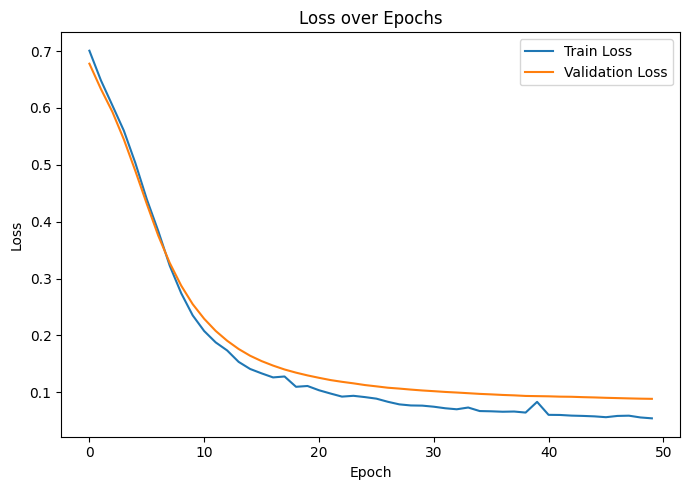

In [ ]:
# Plotting results
plt.figure(figsize=(7, 5))

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Now you know how to use PyTorch for NNs :)


![image.png](https://i.imgur.com/1xbDOQX.jpeg)

### **Contributed by: Yara Alzahrani, Mohamed Eltayeb**